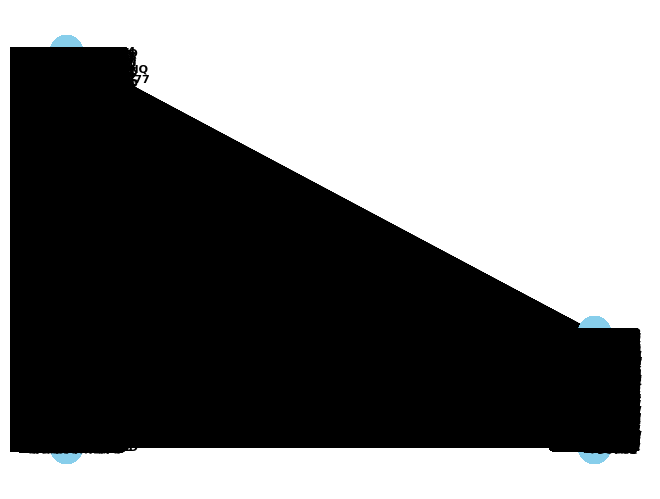

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df1 = pd.read_feather('./data/text_df_1.feather')
df2 = pd.read_feather('./data/text_df_2.feather')
df3 = pd.read_feather('./data/text_df_3.feather')

dfs = []

dfs.append(df1)
dfs.append(df2)
dfs.append(df3)

merged_df = pd.concat(dfs, ignore_index=True)

G = nx.Graph()

# Add nodes with the 'UserId' and 'ProductId' as attributes
G.add_nodes_from(merged_df['UserId'], bipartite=0)
G.add_nodes_from(merged_df['ProductId'], bipartite=1)

# Add edges between 'UserId' and 'ProductId'
edges = [(row['UserId'], row['ProductId']) for index, row in merged_df.iterrows()]
G.add_edges_from(edges)

# Separate nodes by bipartite sets
top_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
bottom_nodes = set(G) - top_nodes

# Draw the bipartite graph
# pos = {node: (1, i) for i, node in enumerate(top_nodes)}
# pos.update({node: (2, i) for i, node in enumerate(bottom_nodes)})
# nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=500, font_size=8)

# plt.show()


In [9]:
print(len(merged_df))

568454


In [10]:
G_user_user = nx.Graph()

# Create a set of unique product IDs
unique_products = set(merged_df['ProductId'])

# Iterate over each product and find users who reviewed the same product
for product_id in unique_products:
    users_reviewed = merged_df.loc[merged_df['ProductId'] == product_id, 'UserId'].tolist()
    user_pairs = [(user1, user2) for i, user1 in enumerate(users_reviewed) for j, user2 in enumerate(users_reviewed) if i < j]
    G_user_user.add_edges_from(user_pairs)

# Draw the user-user graph
# nx.draw(G_user_user, with_labels=True, font_weight='bold', node_color='lightcoral', node_size=500, font_size=8)
# plt.title('User-User Graph (Same Product)')
# plt.show()

In [11]:
G_product_product = nx.Graph()

# Create a set of unique user IDs
unique_users = set(merged_df['UserId'])

# Iterate over each user and find products that the user reviewed
for user_id in unique_users:
    products_reviewed = merged_df.loc[merged_df['UserId'] == user_id, 'ProductId'].tolist()
    product_pairs = [(product1, product2) for i, product1 in enumerate(products_reviewed) for j, product2 in enumerate(products_reviewed) if i < j]
    G_product_product.add_edges_from(product_pairs)

# Draw the product-product graph
# nx.draw(G_product_product, with_labels=True, font_weight='bold', node_color='lightgreen', node_size=500, font_size=8)
# plt.title('Product-Product Graph (Same User)')
# plt.show()

In [12]:
# nx.write_gpickle(G, './data/user_product_graph.gpickle')
# nx.write_gpickle(G_user_user, './data/user_user_graph.gpickle')
# nx.write_gpickle(G_product_product, './data/product_product_graph.gpickle')
import pickle

with open('./graphs/user_product_graph.pickle', 'wb') as f_up:
    pickle.dump(G, f_up, pickle.HIGHEST_PROTOCOL)
with open('./graphs/user_user_graph.pickle', 'wb') as f_uu:
    pickle.dump(G_user_user, f_uu, pickle.HIGHEST_PROTOCOL)
with open('./graphs/product_product_graph.pickle', 'wb') as f_pp:
    pickle.dump(G_product_product, f_pp, pickle.HIGHEST_PROTOCOL)